# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

,customer_id,ad_type,ad_medium,ad_response,items_purchased,drinks_purchased,state,sex,age,occupation,family_size,income
0,3226,BOGO - Garlic Steak Nacho Fries,0,True,"['steak garlic nacho fries', 'steak garlic nac...","['gatorade', 'mug root beer', 'baja blast', 'd...",CA,M,30.0,Government,5,62303
1,5217,DISCOUNT-50%,0,False,"['crunchy taco', 'cheesy bean and rice burrito']","['gatorade', 'diet pepsi']",OH,M,36.0,Retail,1,39638
2,5247,REWARD - Free Garlic Steak Nacho Fries with pu...,0,True,"['steak garlic nacho fries', 'cheesy gordita c...","['mountain dew', 'starry']",WV,M,31.0,IT,1,112766
3,7793,DISCOUNT-5%,1,False,"['crunchwrap supreme', 'cravings box', 'crunch...","['baja blast', 'brisk', 'mountain dew']",MI,F,57.0,Government,2,137374
4,5759,DISCOUNT-50%,0,False,"['nachos bellgrande', 'crunchy taco']","['pepsi', 'diet pepsi']",RI,M,22.0,Education,1,41748
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,904,BOGO - Baja Blast,6,False,['steak garlic nacho fries'],['mountain dew'],CA,F,27.0,Government,0,56754
9996,8731,DISCOUNT-5%,4,False,"['crunchwrap supreme', 'spicy potato soft taco...","['mountain dew', 'brisk', 'starry', 'baja blast']",MI,M,44.0,Retail,3,47341
9997,7396,DISCOUNT-10%,6,False,['steak garlic nacho fries'],['gatorade'],UT,M,26.0,Healthcare,0,77525
9998,8559,DISCOUNT-10%,3,False,"['cinnamon twists', 'mexican pizza', 'cinnamon...","['gatorade', 'mug root beer', 'iced tea', 'ice...",FL,F,67.0,Retired,5,0


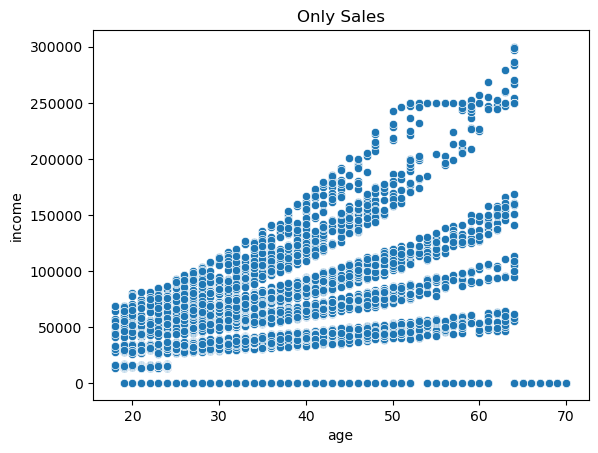

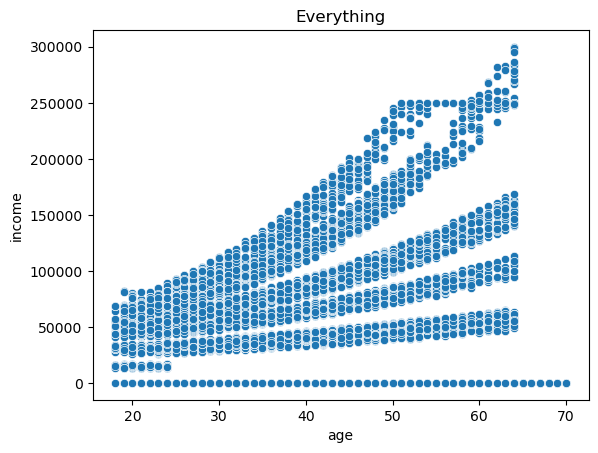

<Figure size 640x480 with 0 Axes>

In [1]:
# Read data into a dataframe(s).
# Don't forget to call info()!

import bs4 as bs
#import random
import pandas as pd
import seaborn as sb
import numpy as np
#import datetime
import requests as rq
import pickle
import math
#import json
#import time
#from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def save_pickle(file, value):
    pickle.dump(value, open(file, "wb"))
def load_pickle(file):
    return pickle.load(open(file, "rb"))

def cluster(data, groups=3):
    pass


ad_data = pd.read_csv("ad_data.csv")
customer = pd.read_csv("customer_data.csv")

data = pd.merge(ad_data, customer, on='customer_id', how="inner") 


data['ad_medium'].unique()
data['ad_type'].unique()
data['age'].unique()

mask = data['ad_response'] == False

#display(data[~mask])
#sb.scatterplot(data=data[~mask], x='age', y='ad_medium')
#plt.figure()
#sb.scatterplot(data=data, x='age', y='ad_medium')
#plt.figure()
#sb.scatterplot(data=data, x='age', y='ad_type')
#plt.figure()
#sb.scatterplot(data=data[~mask], x='age', y='ad_type')
#plt.figure()
#sb.scatterplot(data=data, x='age', y='income')
#plt.figure()
#sb.scatterplot(data=data[~mask], x='age', y='income')

mediums = {'15 sec YouTube ad': 0, '30 sec Hulu commercial': 1, 'Instagram photo ad': 2, '30 sec cable TV ad': 3, 'Static Facebook ad': 4, 'Newspaper ad': 5, '15 sec TikTok ad': 6}
mediumsRev = {0: '15 sec YouTube ad', 1: '30 sec Hulu commercial', 2: 'Instagram photo ad', 3: '30 sec cable TV ad', 4: 'Static Facebook ad', 5: 'Newspaper ad', 6: '15 sec TikTok ad'}

for key in data.to_dict()['ad_medium']:
    #data['ad_medium'][key] = mediums[data.iloc[key]['ad_medium']]
    data.loc[key, "ad_medium"] = mediums[data.iloc[key]['ad_medium']]
plt.title("Only Sales")
sb.scatterplot(data=data[~mask], x='age', y='income')
plt.figure()
plt.title("Everything")
sb.scatterplot(data=data, x='age', y='income')
plt.figure()


display(data)

train_df, _ = train_test_split(data, test_size=0.3, random_state=42)
train_df = train_df[["age", "income", "ad_medium", "family_size"]]
train_df.head()
train_df.reset_index(drop=True, inplace=True)

model = KMeans(n_clusters=7 ,max_iter=1000)
model.fit(train_df)
model.cluster_centers_

lbl = model.labels_

newData = pd.merge(train_df, pd.DataFrame(model.labels_), how="left", right_index=True, left_index=True) 



<Axes: xlabel='Clusters', ylabel='Inerta'>

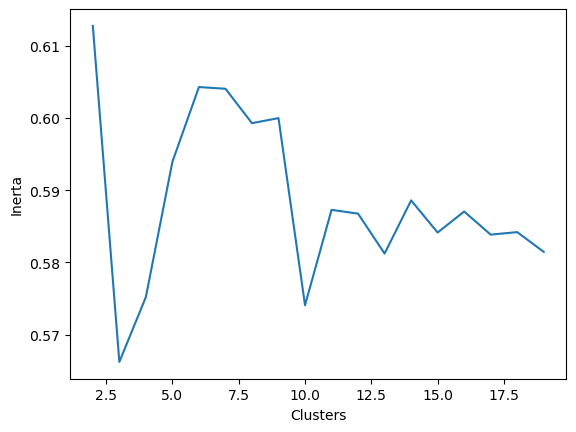

In [23]:
#for key in newData.to_dict()[0]:
#    #data['ad_medium'][key] = mediums[data.iloc[key]['ad_medium']]
#    newData.loc[key, 0] = mediumsRev[newData.iloc[key][0]]

#sb.scatterplot(data=newData[~mask], x='age', y='income', hue=0, palette="deep")
#newData = pd.merge(train_df, pd.DataFrame(model.labels_), how="left", right_index=True, left_index=True) 

plot = {
    "Clusters": range(2,20),
    "Inerta": []
}

for k in range(2,20):
    kmeans = KMeans(n_clusters=k ,max_iter=1000)
    labels = kmeans.fit_predict(train_df)
    plot['Inerta'].append(silhouette_score(train_df, labels))

sb.lineplot(data=plot, x="Clusters", y="Inerta")
    

<Axes: xlabel='Clusters', ylabel='Inerta'>

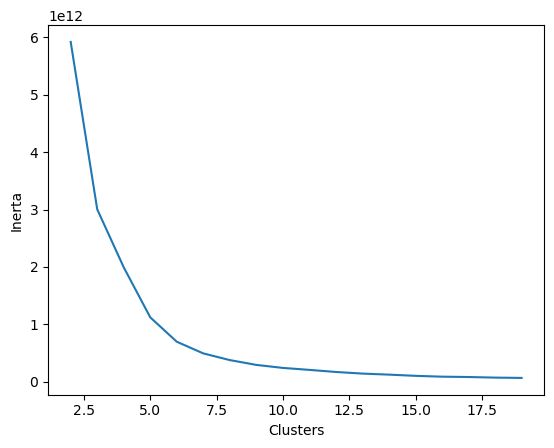

In [24]:
plot = {
    "Clusters": range(2,20),
    "Inerta": []
}

for k in range(2,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_df)
    plot['Inerta'].append(kmeans.inertia_)

sb.lineplot(data=plot, x="Clusters", y="Inerta")



/tmp/ipykernel_104694/91342256.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sb.scatterplot(data=newData[~mask], x='age', y='income', hue=0, palette="deep")


<Axes: xlabel='age', ylabel='income'>

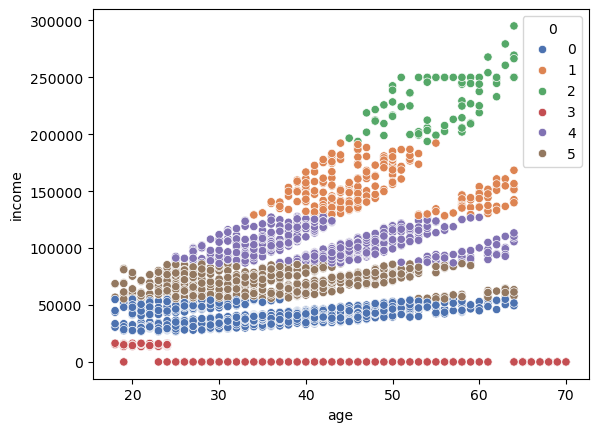

In [27]:
# Actually doing it with the optiomal ammount of clusters

model = KMeans(n_clusters=6 ,max_iter=1000)
model.fit(train_df)
model.cluster_centers_

lbl = model.labels_

newData = pd.merge(train_df, pd.DataFrame(model.labels_), how="left", right_index=True, left_index=True)
sb.scatterplot(data=newData[~mask], x='age', y='income', hue=0, palette="deep")

### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

*Note, level 5 work uses at least 3 features to train a K-means model using only the standard Python library and Pandas. A level 4 uses external libraries like scikit or numpy.*

In [16]:
# Read data into a dataframe.
# Don't forget to call info()!

model.cluster_centers_






array([[3.60229885e+01, 4.05837444e+04],
       [4.18927039e+01, 1.02311022e+05],
       [5.61775148e+01, 2.34373982e+05],
       [4.81176471e+01, 1.51929424e+05],
       [3.48998912e+01, 6.89088177e+04],
       [4.14258760e+01, 5.01352561e+03]])

#### Don't forget to describe the centers of the clusters you found.

### 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

In [2]:
model.cluster_centers_


model.cluster_centers_model.cluster_centers_model.cluster_centers_# Test model here.

#### Interpret your elbow plot and/or silhouette score here.

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

#### Describe the cluster you are targeting here.

The targeted cluster is old ritch men.

#### Link your ad here.

[AD](https://www.canva.com/design/DAGdvZPzktI/5jBPOSaQdBmLFcl3pSH48A/edit?utm_content=DAGdvZPzktI&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)